# Working with loops

The function solves the dynamical system $u_{n+1} = f(u_n)$ with initial conditions $u_0$, $p$ parameters and $n$ steps

In [1]:
# define the function to solve the dynamical system
function solve_system(f, u0, p, n)
    u = u0
    for i in 1:n-1
        u = f(u,p)
    end
    u
end


solve_system (generic function with 1 method)

In [5]:
# define the dynamical system
f(u,p) =  u^2 - u*p

f (generic function with 1 method)

The critical points are obtained by $u^* = f(u^*)$, from which we get two points $u_1 = 0$ and $u_2 = p + 1$. Next, we evaluated the derivatives on those critical points and find that $f'(u_1 = 0) = - p$ and $f'(u_2 = p + 1) = p + 2$. For the specific value of $p = 0.25$, we get $f'(u_1) <1$ which is a stable/attractor point, whereas for $u_2$, is an unstable point.

In [8]:
# checking the above result for u_1
for i in 1:10
    println(solve_system(f, 1.0, 0.25, i))
end

1.0
0.75
0.375
0.046875
-0.009521484375
0.002471029758453369
-0.0006116514515461802
0.00015328698038472358
-3.829824819782543e-5
9.57602880527138e-6


In [9]:
# checking the above result for u_2
for i in 1:10
    println(solve_system(f, 1.251, 0.25, i))
end

1.251
1.2522509999999998
1.2550698170009995
1.2614327912966727
1.2758544891343468
1.3088410551606784
1.3858546438839485
1.5741294330037188
2.0843511135976796
3.8234317863564664


In [13]:
# defining the Lorenz dynamical system, the solution provides with a vector with the last three entries
function lorenz(u,p)
    α,σ,ρ,β = p
    du1 = u[1] + α*(σ*(u[2]-u[1]))
    du2 = u[2] + α*(u[1]*(ρ-u[3]) - u[2])
    du3 = u[3] + α*(u[1]*u[2] - β*u[3])
    [du1,du2,du3]
end
p = (0.02,10.0,28.0,8/3)
solve_system(lorenz,[1.0,0.0,0.0],p,1000)

3-element Vector{Float64}:
  1.4744010677851374
  0.8530017039412324
 20.62004063423844

In [14]:
function solve_system_save(f,u0,p,n)
    u = Vector{typeof(u0)}(undef,n)
    u[1] = u0
    for i in 1:n-1
        u[i+1] = f(u[i],p)
    end
    u
end
to_plot = solve_system_save(lorenz,[1.0,0.0,0.0],p,1000)

1000-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.8, 0.56, 0.0]
 [0.752, 0.9968000000000001, 0.008960000000000001]
 [0.80096, 1.3978492416000001, 0.023474005333333336]
 [0.92033784832, 1.8180538219817644, 0.04461448495326095]
 [1.099881043052353, 2.296260732619613, 0.07569952060880669]
 [1.339156980965805, 2.864603692722823, 0.12217448583728006]
 [1.6442463233172087, 3.5539673118971193, 0.19238159391549564]
 [2.026190521033191, 4.397339452147425, 0.2989931959555302]
 [2.5004203072560376, 5.431943011293093, 0.4612438424853632]
 ⋮
 [6.8089180814322185, 0.8987564841782779, 31.6759436385101]
 [5.6268857619814305, 0.3801973723631693, 30.108951163308078]
 [4.577548084057778, 0.13525687944525802, 28.545926978224173]
 [3.6890898431352737, 0.08257160199224252, 27.035860436772758]
 [2.9677861949066675, 0.15205611935372762, 25.600040161309696]
 [2.4046401797960795, 0.2914663505185634, 24.24373008707723]
 [1.9820054139405763, 0.46628657468365653, 22.964748583050085]
 [1.6788616460891923, 

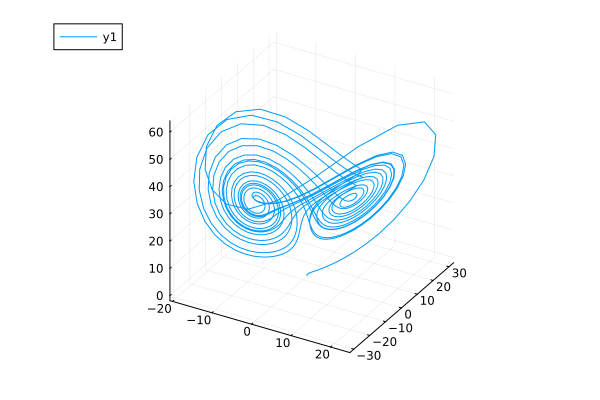

In [15]:
using Plots
x = [to_plot[i][1] for i in 1:length(to_plot)]
y = [to_plot[i][2] for i in 1:length(to_plot)]
z = [to_plot[i][3] for i in 1:length(to_plot)]
plot(x,y,z)